## Install dependencies before running this notebook

- if haven't already, create new conda environment by running `conda create -n slic3r-to-aerotech-examples -y`
- activate environment: `conda activate slic3r-to-aerotech-examples -y`
- `conda install pip -y`
- `pip install -r requirements.txt`
- `conda install -n slic3r-to-aerotech-examples ipykernel --update-deps --force-reinstall -y`
- now confirm the `slic3r-to-aerotech-examples` kernel is active in jupyter notebook (see screenshot below)

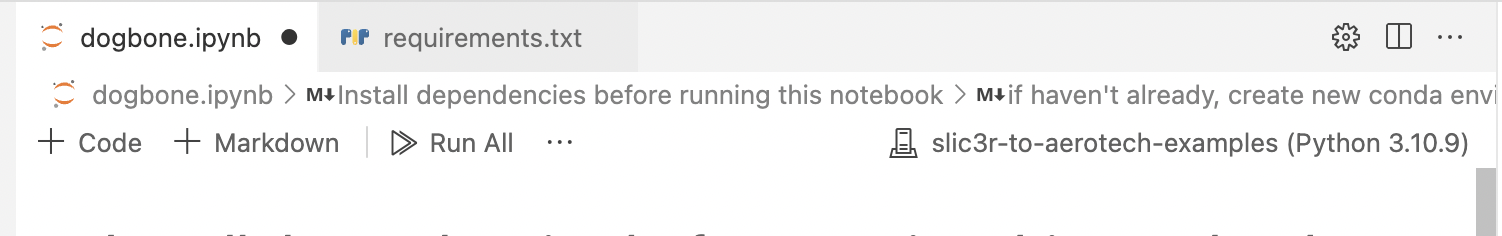


**TODO:**

- [ ] modify gcode with pressure `P` from Print Conditions below
- [ ] modify gcode with print speed `v_N` from Print Conditions below
- [ ] modify gcode with job speed `jog_speed` from Print Conditions below

In [1]:
from os import path, getcwd
import numpy as np
from parser import parse_gcode

## **Workflow**

- 1. export CAD model as an STL
- 2. import STL into SLIC3R software
- 3. export gcode from SLIC3R and save in `slic3r_ouput` folder
- 4. run slic3r2aerotech script and save file in `slic3r_to_aerotech_output` with `_sliced.gcode` at end of filename
- 5. use this jupyter notebook to do any final post processing

## Run `slic3r2aerotech` software

In [2]:
!python utils.py

Already up to date.


## Input file

In [2]:
file_name = 'D638_TYPE_V'
input_file  = path.join(getcwd(), 'slic3r_to_aerotech_output', f'{file_name}_sliced.gcode')
output_file = path.join(getcwd(), 'gcode', f'{file_name}_final.pgm')

## Print Conditions

In [3]:
print_settings = {
    'd_N' : 0.250, # mm
    'v_N' : 2.4, # mm/s
    'jog_speed' : 15, # mm/s
    'jog_height' : 10, # mm
    # 'H' : 0.25,
    # 'dz' : d_N*0.8,
    'P' : 25, # psi

    'ACCEL_DEFAULT' : 250, # mm/s^2
    'DECEL_DEFAULT' : 500, # mm/s^2
}



In [4]:
parse_gcode(input_file, output_file, print_settings)

# Visualize gcode

In [5]:
from mecode_viewer.mecode_viewer import mecode_viewer

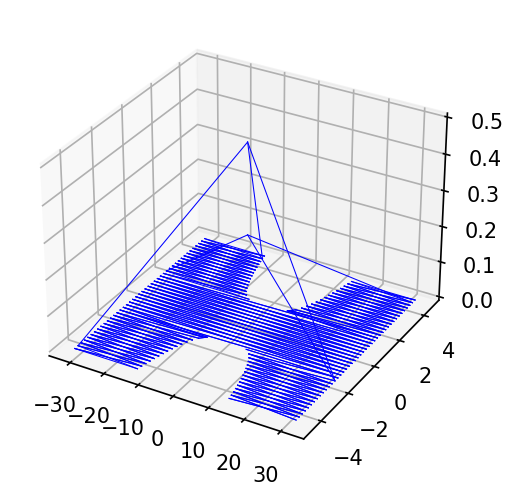

Text(-0.04432813693489138, -0.09597323172012794, 'j')

In [9]:
ax, history = mecode_viewer(output_file, 'abs', verbose=True)

Can also use `https://ncviewer.com/` to view gcode step by step